# Метод Ньютона, метод Дихотомии и метод сопряженных направлений нулевого порядка


In [11]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Одномерная оптимизация. Метод Ньютона

**Задача 17.83.** Убедившись в выпуклости функции $f(x) = x^4 + e^{-x}$ на отрезке $[0,1]$, найти её точку минимума $x^*$ и минимальное значение $f^*$ методом Ньютона. Критерием достижения требуемой точности считать выполнение неравенства $|f'(x_n)| \leq 10^{-6}$

In [12]:
def f(x):
    return x ** 4 + np.exp(-x)

def df(x):
    return 4 * x ** 3 - np.exp(-x)

def d2f(x):
    return 12 * x ** 2 + np.exp(-x)

### Убедимcя в выпуклоcти $f(x)$ на отрезке $[0,1]$

In [13]:
a = 0
b = 1
is_convex = True  # Предположим, что функция выпукла

for xi in np.linspace(a, b, 100):
    h = 1e-6
    df2 = (f(xi + h) - 2 * f(xi) + f(xi - h)) / h**2 # вторая производная
    
    if df2 < 0:
        is_convex = False
        break

if is_convex:
    print(f'Функция выпукла на отрезке [{a}, {b}]')
else:
    print(f'Функция не является выпуклой на отрезке [{a}, {b}]')

Функция выпукла на отрезке [0, 1]


### Метод Ньютона

Нашей целью является поиск решения уравнения $f'(x) = 0$. Можно решать эту задачу так: 

1. Задаем $x_0$
2. Проводим в этой точке касательную к функции $f'(x)$, находим точку $x_1$ пересечения этой касательной с осью $Ox$. Ордината точек касательной описывается уравнением: $f'(x_k) + f''(x_k)(x - x_k)$, поэтому приравняв это выражение к нулю, найдем $x_{k+1}$: 

    $x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}$

3. Продолжаем процедуру до тех пор пока не выполнится критерий остановки $|f'(x_k)| \leq \varepsilon$, для некоторого положительного $\varepsilon$


In [14]:
def Newton_method(x0, eps, df, d2f):

    k = 0
    x_values = [x0]  # Для хранения значений x на каждой итерации
    y_values = [df(x0)]  # Для хранения значений производной на каждой итерации
    
    while abs(df(x0)) > eps:
        
        k += 1
        
        x1 = x0  - df(x0) / d2f(x0)
        x0 = x1
        
        x_values.append(x0)
        y_values.append(df(x0))
        
    return x0, k, x_values, y_values

In [15]:
eps = 1e-6
x0 = -3
x_min, k, x_values, y_values = Newton_method(x0, eps, df, d2f)

print('x0 =', x0)
print('x* =', x_min)
print('f* =', f(x_min))
print('k =', k)

x0 = -3
x* = 0.5282518761953651
f* = 0.6675037513807414
k = 10


### График $f(x)$

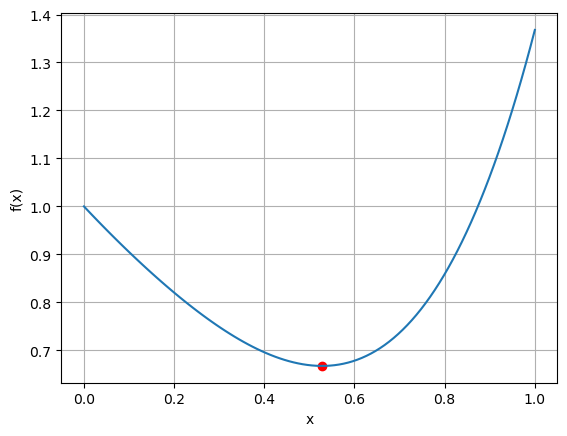

In [16]:
x = np.linspace(0, 1, 100)
ff = [f(xi) for xi in x]

plt.plot(x, ff)
plt.scatter(x_min, f(x_min), color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

### График $f'(x)$

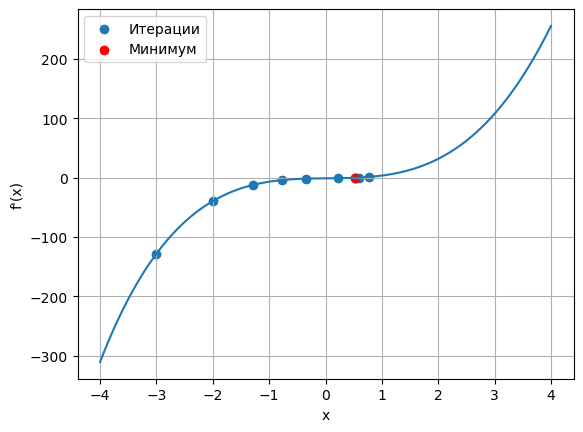

In [17]:
x = np.linspace(-4, 4, 100)
ddf = [df(xi) for xi in x]

plt.plot(x, ddf)
plt.scatter(x_values[:-1], y_values[:-1], label='Итерации')
plt.scatter(x_values[-1], y_values[-1], color='red', label='Минимум')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()
plt.grid()

# 2. Многомерная оптимизация (безусловная). Метод сопряжённых направлений нулевого порядка

**Задача 1f.** Методом сопряженных направлений нулевого порядка минимизировать функции:

A: $f(x_1, x_2) = (x_1 + 1)^2 + 2(x_2 - 1)^2$

C: $f(x_1, x_2) = 9x_1^2 + x_1x_2 + x_2^2$

In [18]:
def fA(x):
    x1, x2 = x
    return (x1 + 1) ** 2 + 2 * (x2 - 1) ** 2

def fC(x):
    x1, x2 = x
    return 9 * x1 ** 2 + x1 * x2 + x2 ** 2

## Нарисуем графики этих функций:

In [19]:
def Draw_Function(fig, index, projection, X, Y, func, title):
    ax = fig.add_subplot(index, projection=projection)
    ax.plot_surface(X, Y, func, cmap='viridis') if projection == '3d' else ax.contourf(X, Y, func, cmap='viridis')
    ax.set_xlabel('x1', fontsize=12, labelpad=10)
    ax.set_ylabel('x2', fontsize=12, labelpad=10)
    ax.set_title(title, fontsize=20)

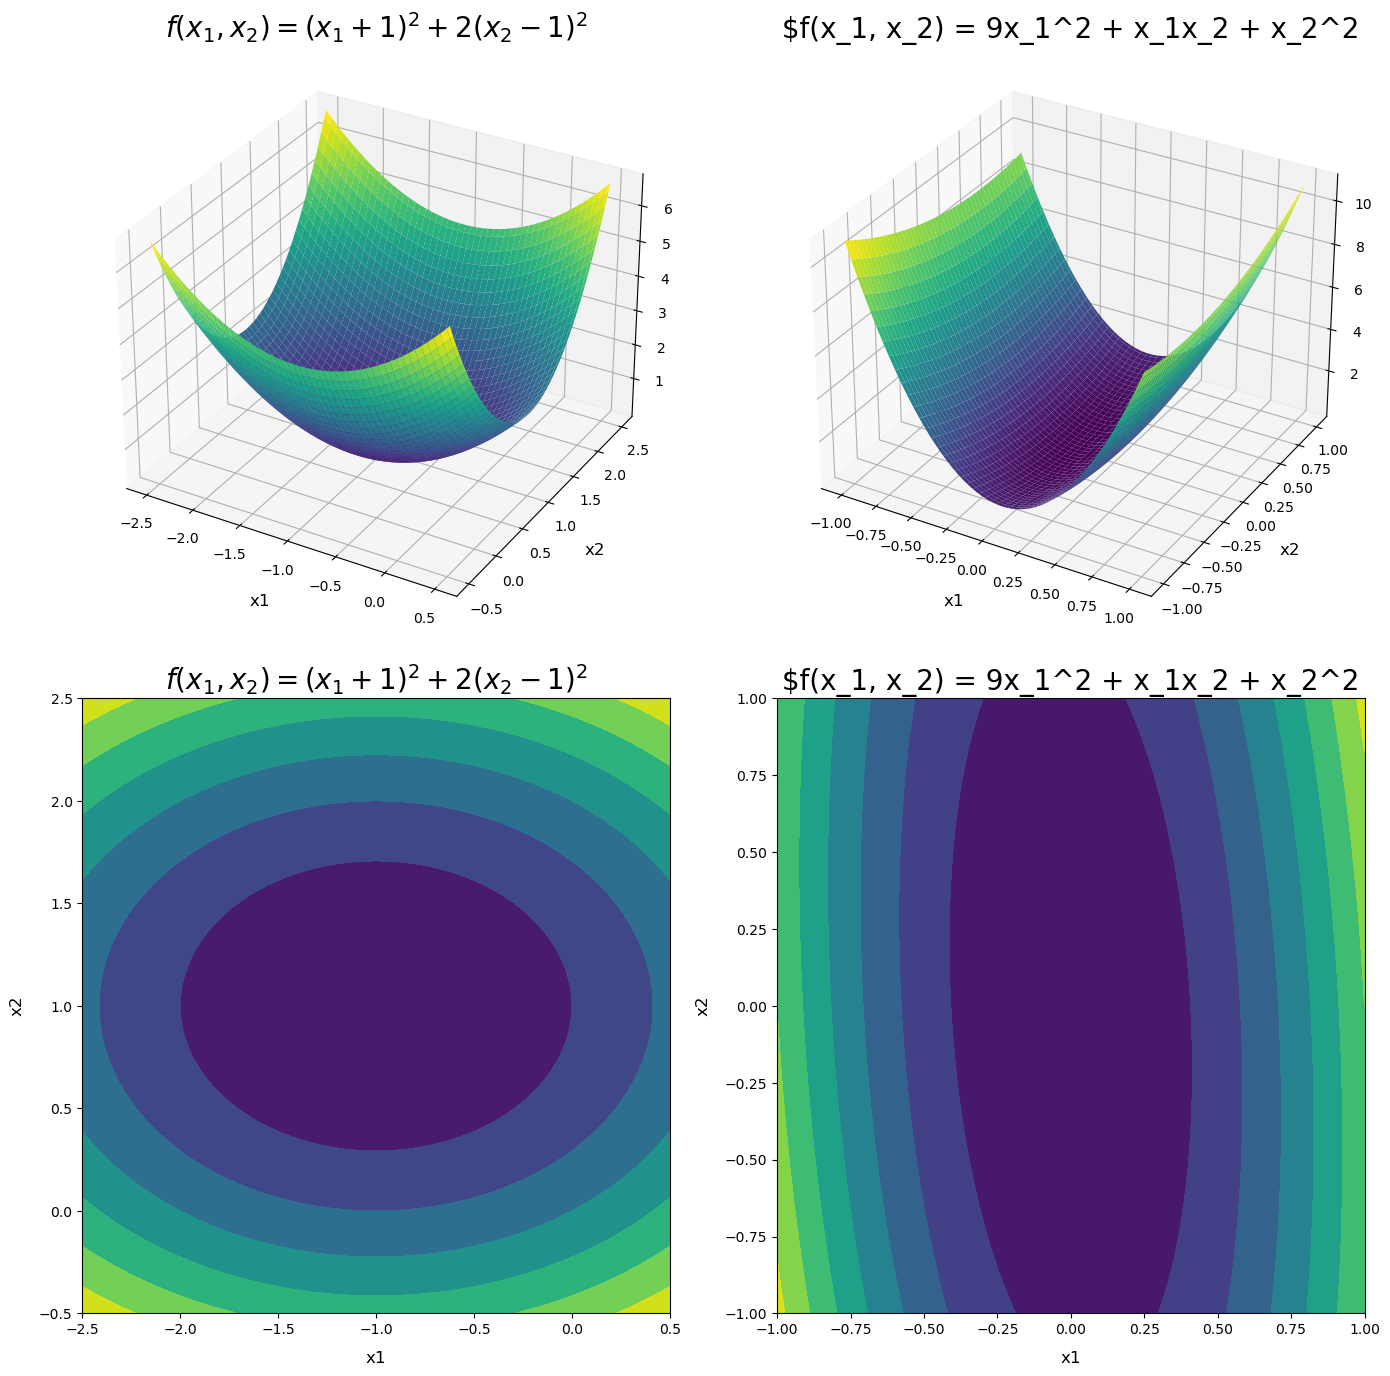

In [20]:
fig = plt.figure(figsize=(14, 14))

X_ranges = [(-2.5, 0.5), (-1, 1)]
Y_ranges = [(-0.5, 2.5), (-1, 1)]
functions = [fA, fC]
titles = ["$f(x_1, x_2) = (x_1 + 1)^2 + 2(x_2 - 1)^2$",
          "$f(x_1, x_2) = 9x_1^2 + x_1x_2 + x_2^2"]

for i in range(2):
    X = np.linspace(X_ranges[i][0], X_ranges[i][1], 100)
    Y = np.linspace(Y_ranges[i][0], Y_ranges[i][1], 100)
    xx, yy = np.meshgrid(X, Y)
    z = functions[i]([xx, yy])
    Draw_Function(fig, 221 + i, '3d', xx, yy, z, titles[i])
    Draw_Function(fig, 223 + i, None, xx, yy, z, titles[i])

plt.tight_layout()

## Одномерную задачу минимизации решим методом Дихотомии

In [21]:
def minimize(a, b, f):
    
    a1 = a
    b1 = b
    
    delta = 0.001
    
    while b1 - a1 > 2 * 0.01:
        
        c1 = (a1 + b1) / 2 - delta / 2
        d1 = (a1 + b1) / 2 + delta / 2

        if f(c1) <= f(d1):
            b1 = d1

        elif f(c1) > f(d1): 
            a1 = c1

    return (a1 + b1) / 2

## Алгоритм метода сопряженных направлений нулевого порядка

1. Начать с точки $x^{(0)}$ и выбрать начальное направление $d^{(0)}$.

2. Начать итерационный процесс:

   a. Выполнить одномерный поиск в направлении $d^{(k-1)}$ с использованием метода Ньютона, чтобы найти точку минимума в этом направлении. Получить точку $z^{(k)}$.

   b. Выполнить последовательные одномерные поиски для функции $f(x)$ в направлениях $d^{(k-1)}, d^{(k-2)}, ..., d^{(0)}$, чтобы найти точку $x^{(k)}$.

   c. Определить новое направление $d^{(k)}$ как $d^{(k)} = z^{(k)} - x^{(k)}$.

3. Повторять шаг 2 до достижения критерия останова

In [22]:
def ZeroOrderCDM(x0, f, max_iter, eps):

    k = 0
    x = x0
    n = len(x0)
    d = np.identity(n)
    x_history = [x.copy()]

    while k < max_iter:
        def objective(alpha):
            return f(x + alpha * d[k])

        alpha = minimize(-10, 10, objective)
        x = x + alpha * d[k]

        for i in range(k):
            d[i] = d[i+1]

        if k < n - 1:
            d[k] = x - x0
        else:
            d[k] = x - x0
            x0 = x
            k = -1

        if np.linalg.norm(d[k]) < eps:
            break

        k += 1
        x_history.append(x.copy())

    return x, x_history

In [27]:
x0 = np.array([5.0, 10.0])
xA, xA_history = ZeroOrderCDM(x0, fA, max_iter=1000, eps=1e-6)

print("Оптимальный вектор параметров:", round(xA[0], 2), round(xA[1], 2))
print("Минимальное значение функции:", round(fA(xA), 2))

Оптимальный вектор параметров: -1.0 1.0
Минимальное значение функции: 0.0


In [14]:
xA_history

[array([0., 0.]),
 array([-1.00092651,  0.        ]),
 array([-1.00092651,  1.00092651]),
 array([-1.00092651,  0.99604395]),
 array([-1.00581361,  1.00093104]),
 array([-1.00092651,  0.99604395]),
 array([-0.99999591,  0.99604308]),
 array([-1.00001977,  0.99604311]),
 array([-1.00277509,  0.99835809]),
 array([-1.00274668,  0.99833422]),
 array([-1.00276025,  0.99834552]),
 array([-1.00274668,  0.99833422]),
 array([-1.00277732,  0.99836017])]

Text(0, 0.5, '$x_2$')

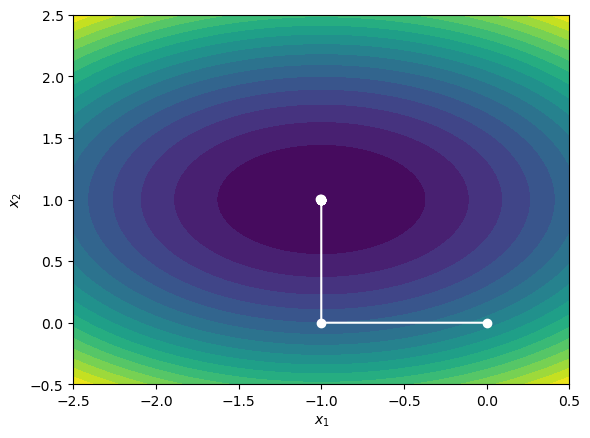

In [15]:
x1 = np.linspace(-2.5, 0.5, 400)
x2 = np.linspace(-0.5, 2.5, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = fA((X1, X2))

# Построение контурного графика и точек
plt.contourf(X1, X2, Z, levels=20)
x_points = [point[0] for point in xA_history]
y_points = [point[1] for point in xA_history]
plt.plot(x_points, y_points, marker='o', markersize=6, color='white')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [31]:
x0 = np.array([0.5, -0.3])
xC, xC_history = ZeroOrderCDM(x0, fC, max_iter=1000, eps=1e-6)

print("Оптимальный вектор параметров:", round(xC[0], 2), round(xC[1], 2))
print("Минимальное значение функции:", round(fC(xC), 2))

Оптимальный вектор параметров: 0.0 -0.0
Минимальное значение функции: 0.0


In [32]:
xC_history

[array([ 0.5, -0.3]),
 array([ 0.01662573, -0.3       ]),
 array([ 0.01662573, -0.01192847]),
 array([ 0.01662573, -0.0070459 ]),
 array([0.00010498, 0.0027998 ]),
 array([-0.00225513,  0.00420633]),
 array([8.41169855e-05, 2.12089127e-03]),
 array([0.00016478, 0.00204898]),
 array([ 9.94942859e-05, -7.58322758e-05]),
 array([ 9.93924350e-05, -7.91471147e-05]),
 array([ 9.91671928e-05, -4.69701560e-05]),
 array([ 9.90921121e-05, -3.62445031e-05]),
 array([ 9.91320384e-05, -3.97675349e-05])]

Text(0, 0.5, '$x_2$')

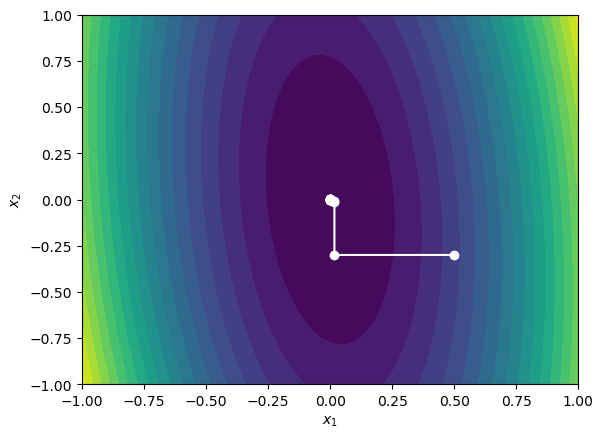

In [33]:
x1 = np.linspace(-1, 1, 400)
x2 = np.linspace(-1, 1, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = fC((X1, X2))

# Построение контурного графика и точек
plt.contourf(X1, X2, Z, levels=20)
x_points = [point[0] for point in xC_history]
y_points = [point[1] for point in xC_history]
plt.plot(x_points, y_points, marker='o', markersize=6, color='white')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')